https://archive.ics.uci.edu/dataset/487/gas+sensor+array+temperature+modulation

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as OLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CO_sensors.csv')

In [4]:
df

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.21,26.3800,247.2771,0.1994,0.5114,0.5863,0.5716,1.9386,1.1669,0.7103,0.5541,51.0146,40.8079,47.8748,4.6007,1.0259,0.6300,0.4302
1,0.311,0.0,49.21,26.3800,243.3618,0.7158,0.0626,0.1586,0.1161,0.1347,0.1385,0.1545,0.1307,0.1935,0.1341,0.1773,0.1403,0.1399,0.1243,0.1236
2,0.620,0.0,49.21,26.3800,242.4944,0.8840,0.0654,0.1496,0.1075,0.1076,0.1131,0.1363,0.1188,0.1195,0.1049,0.1289,0.1189,0.1216,0.1106,0.1130
3,0.930,0.0,49.21,26.3800,241.6242,0.8932,0.0722,0.1444,0.1074,0.1032,0.1106,0.1306,0.1190,0.1125,0.1014,0.1232,0.1153,0.1185,0.1091,0.1114
4,1.238,0.0,49.21,26.3800,240.8151,0.8974,0.0767,0.1417,0.1098,0.1025,0.1116,0.1284,0.1208,0.1111,0.1008,0.1226,0.1140,0.1175,0.1090,0.1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295695,90900.490,0.0,61.62,25.4168,0.0000,0.2012,69.6423,78.3034,81.5100,33.0330,75.4675,86.6118,79.0768,68.2983,57.1512,68.7283,72.8909,67.4369,52.8453,69.4831
295696,90900.800,0.0,61.62,25.4131,0.0000,0.2010,71.9176,75.6194,76.4748,30.5466,71.7732,74.2258,73.7472,70.1254,60.0710,70.9577,66.2834,65.9633,54.4839,71.7899
295697,90901.109,0.0,61.62,25.4094,0.0000,0.2008,63.1793,69.6423,76.4748,30.8047,67.3691,67.0156,68.5895,70.1254,57.5820,72.1267,71.1727,63.1158,52.2052,70.6179
295698,90901.419,0.0,61.62,25.4025,0.0000,0.2000,58.5022,64.5303,64.1416,28.5219,59.1755,60.5782,61.7820,66.6625,59.6029,67.6646,64.3359,60.8831,52.4943,68.3837


In [6]:
df.describe()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
count,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000,295700.000000
mean,45435.140266,9.900266,45.607506,26.720057,239.943680,0.355212,15.198374,17.440031,22.151461,19.759571,31.360319,28.601243,31.640992,26.658295,23.000006,25.417975,27.205435,25.201259,22.026591,28.258380
std,26245.705362,6.426957,12.445601,0.418020,1.697848,0.288572,22.583110,26.665302,28.585001,16.412620,27.068315,27.198270,27.612186,19.523869,17.919762,20.410103,20.348773,18.560530,17.036098,21.982871
min,0.000000,0.000000,16.430000,25.380000,0.000000,0.199000,0.032400,0.055500,0.054100,0.039400,0.048000,0.049300,0.051700,0.033400,0.029100,0.036800,0.030900,0.032700,0.033100,0.031600
25%,22696.213500,4.440000,36.140000,26.380000,239.904200,0.200000,0.404800,0.481400,0.579400,1.943600,1.720100,1.508600,1.803350,11.698700,8.446000,7.560700,10.298800,9.456700,7.596400,9.475200
50%,45430.543000,8.890000,46.700000,26.660000,239.971600,0.200000,1.712100,1.366400,4.066700,19.943400,32.317000,22.592900,31.299600,26.472100,21.568500,23.121100,26.682600,25.286000,20.873000,26.355700
75%,68165.081500,15.560000,55.370000,27.060000,240.036600,0.207000,25.850400,29.058300,44.885800,31.755000,51.487500,49.605500,52.417400,40.412900,35.504100,39.885300,41.735100,38.997000,34.058700,44.153750
max,90901.726000,20.000000,72.980000,27.420000,262.316700,0.901000,119.585100,142.519900,127.248300,78.460100,194.675300,122.091300,177.997500,93.414900,109.169300,92.582800,105.096700,129.926100,74.708300,92.521000


In [7]:
df.dtypes

,0
Time (s),float64
CO (ppm),float64
Humidity (%r.h.),float64
Temperature (C),float64
Flow rate (mL/min),float64
Heater voltage (V),float64
R1 (MOhm),float64
R2 (MOhm),float64
R3 (MOhm),float64
R4 (MOhm),float64


<Axes: >

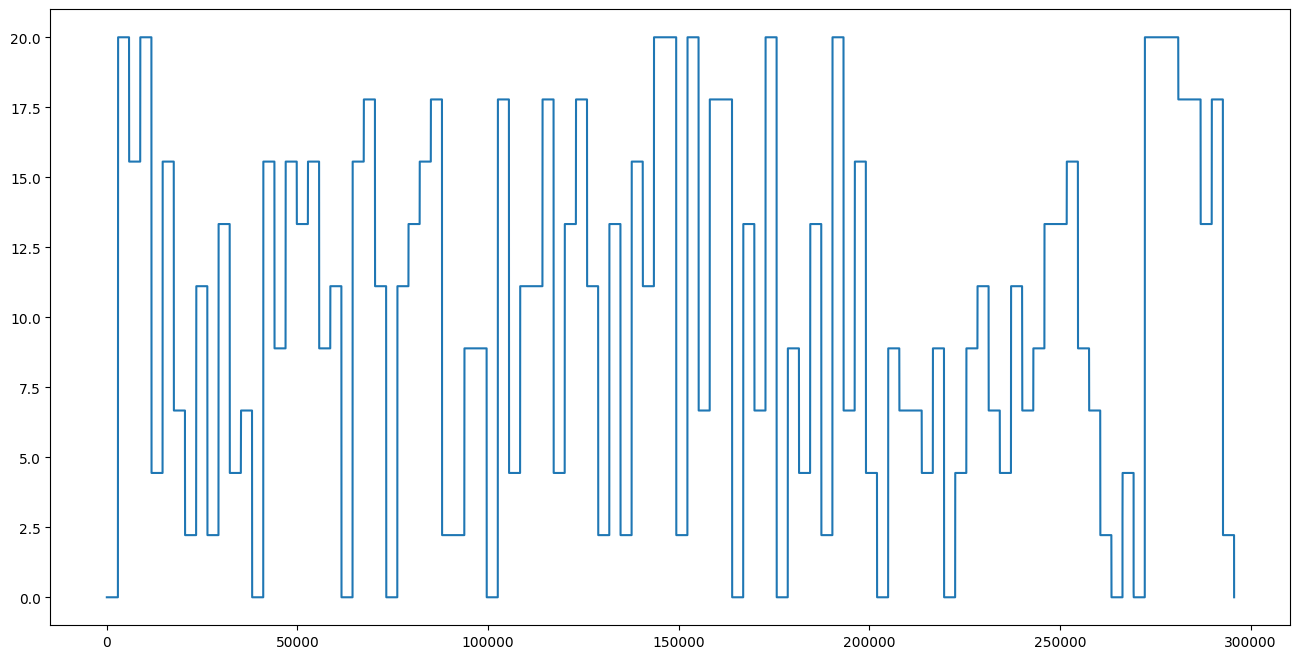

In [25]:
df['CO (ppm)'].plot(figsize=(16,8))

In [39]:
df['CO (ppm)'].name

'CO (ppm)'

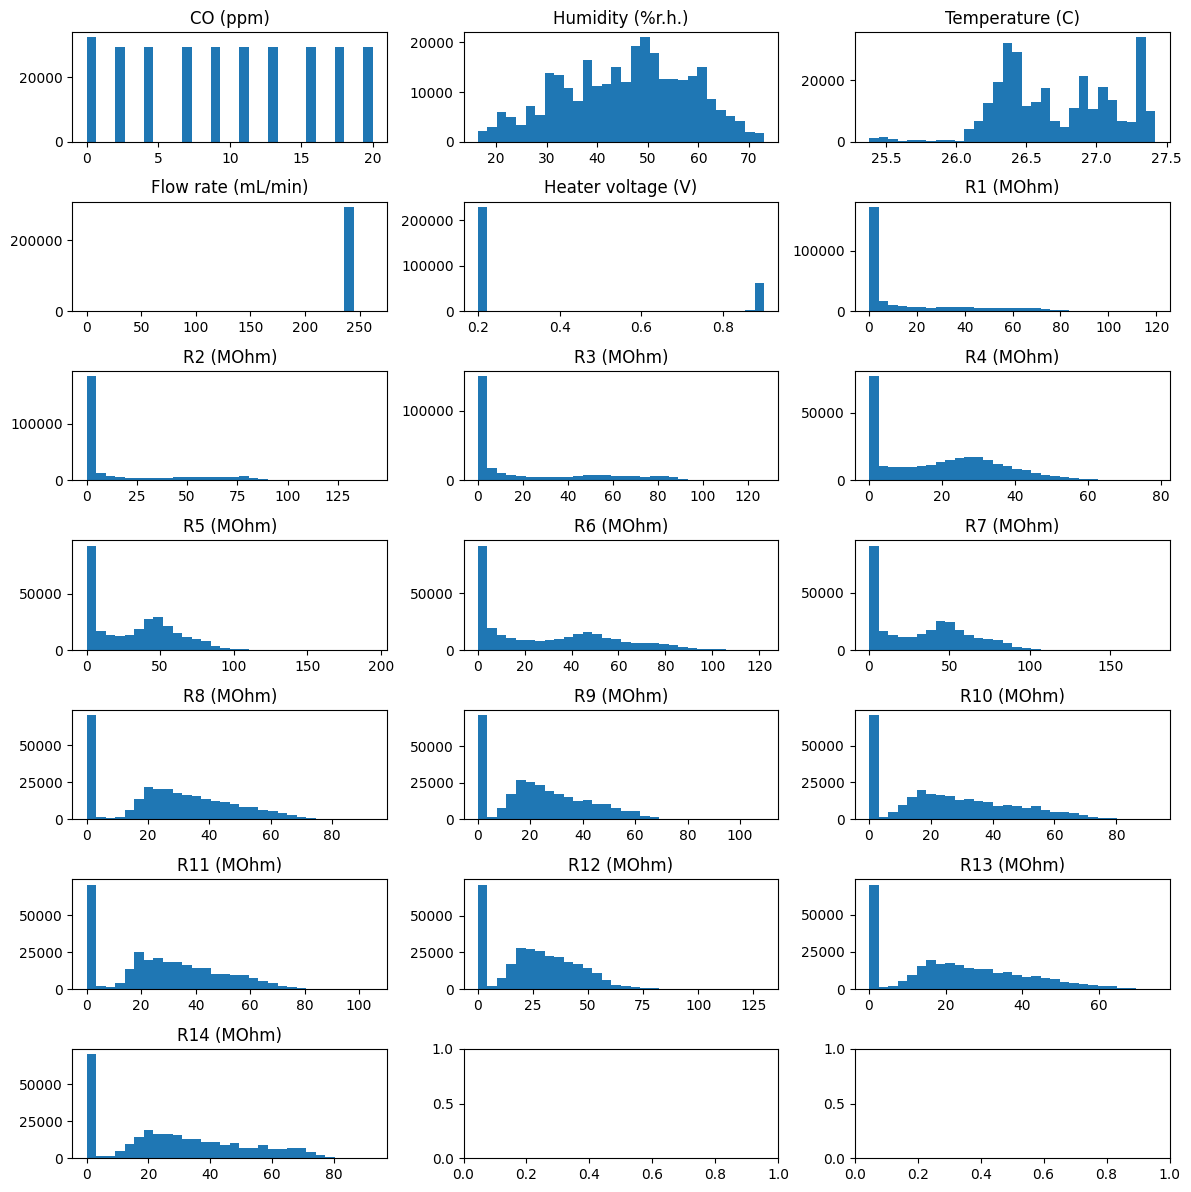

In [49]:
fig, ax = plt.subplots(7, 3, figsize=(12, 12))

for n, ser in enumerate(df.loc[:, 'CO (ppm)':]):
  idx = divmod(n, 3)
  row, col = idx
  ax[row][col].hist(df[ser], bins=30)
  ax[row][col].set_title(df[ser].name)

fig.tight_layout(pad=1.0)

plt.show()

In [50]:
df.columns

Index(['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
       'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)',
       'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)'],
      dtype='object')

In [53]:
df_pairplot =  df.loc[:, 'Time (s)':'Flow rate (mL/min)']
df_pairplot

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min)
0,0.000,0.0,49.21,26.3800,247.2771
1,0.311,0.0,49.21,26.3800,243.3618
2,0.620,0.0,49.21,26.3800,242.4944
3,0.930,0.0,49.21,26.3800,241.6242
4,1.238,0.0,49.21,26.3800,240.8151
...,...,...,...,...,...
295695,90900.490,0.0,61.62,25.4168,0.0000
295696,90900.800,0.0,61.62,25.4131,0.0000
295697,90901.109,0.0,61.62,25.4094,0.0000
295698,90901.419,0.0,61.62,25.4025,0.0000


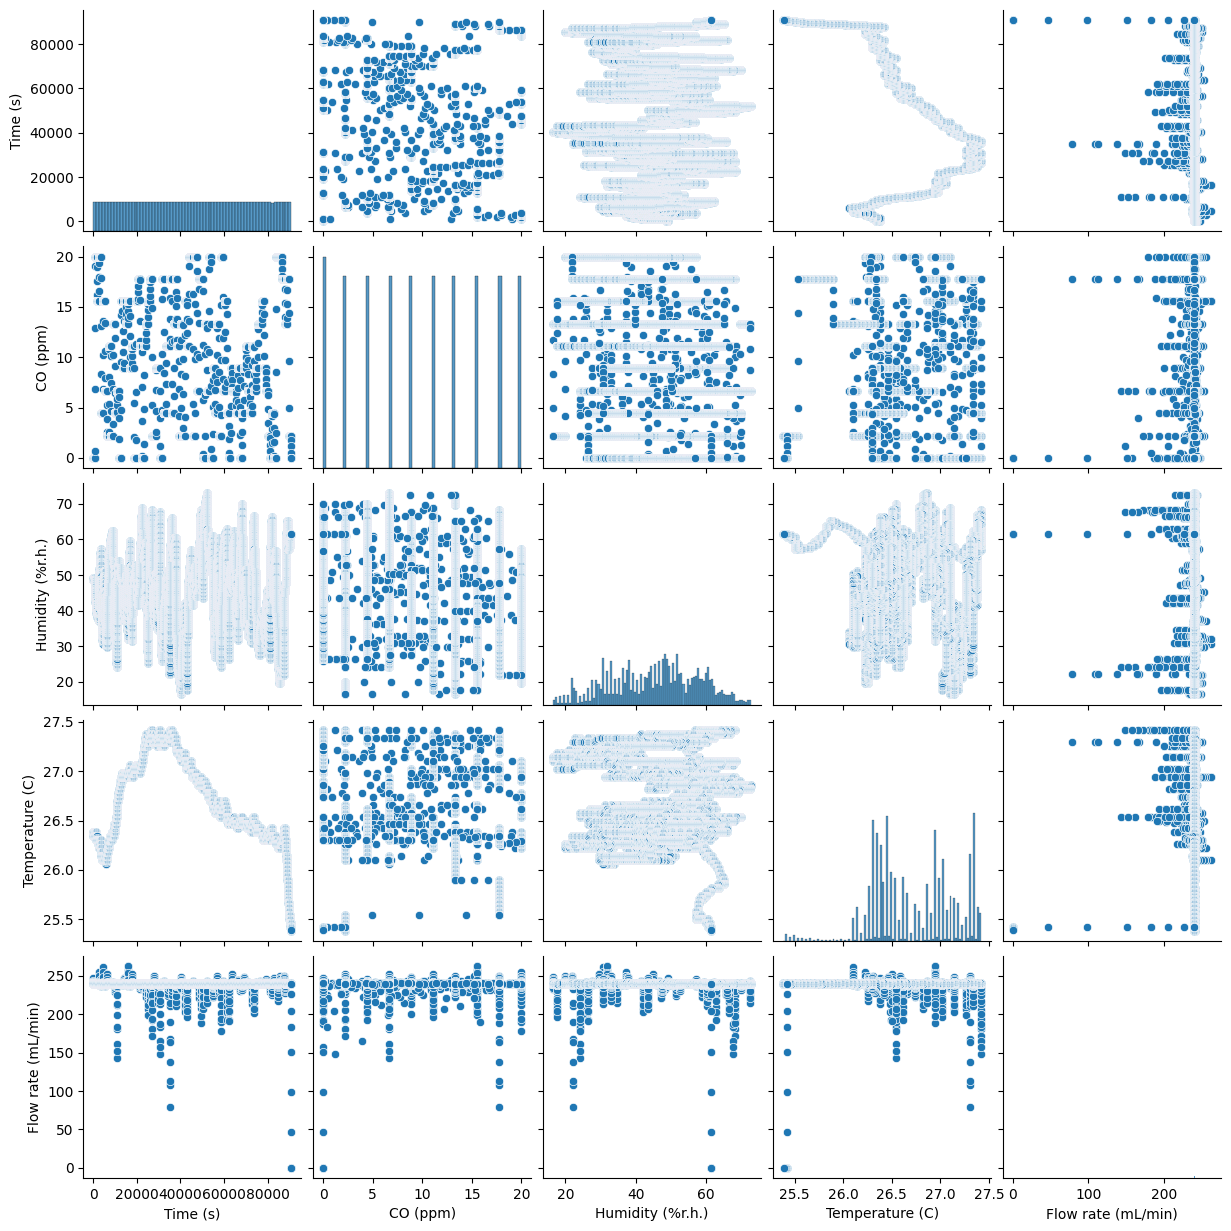

In [54]:
sns.pairplot(df_pairplot)